In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
boston = pd.read_csv('Dataset/housing.csv', header=None, delimiter=r"\s+", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# Display the first few rows of the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston['MEDV'].mean())

22.532806324110698


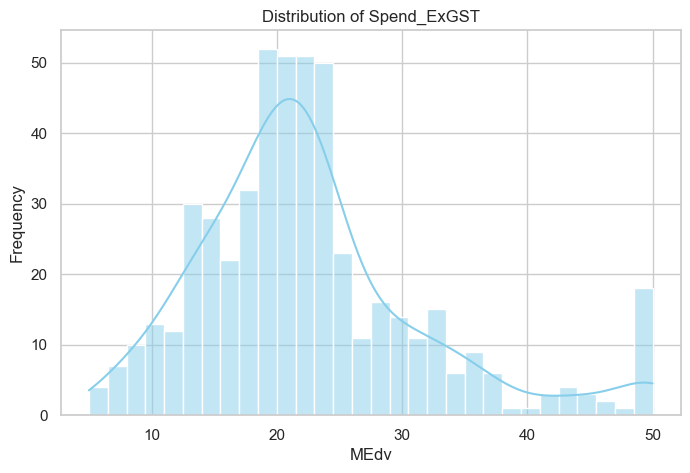

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(boston['MEDV'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('MEdv')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
m1 = LinearRegression()

In [43]:
df = pd.read_csv('Dataset/yearRecord.csv')
df = df[df['YearsAfterInstallation']>0]
df = df[df['YearsAfterInstallation']<30]
df = df[df['Spend_ExGST']>0]
df = df[df['Spend_ExGST']<8000]

In [16]:
X = df[['AssetTypeID','YearsAfterInstallation']]
y = df['Spend_ExGST']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=63)

In [19]:
m1.fit(X_train,y_train)

LinearRegression()

In [20]:
print("Train score : ",m1.score(X_train,y_train))
print("Test score : ",m1.score(X_test,y_test))

Train score :  0.001529724757170281
Test score :  -0.004443388721127484


In [44]:
import numpy as np

In [24]:
df['log_spend'] = np.log1p(df['Spend_ExGST'])

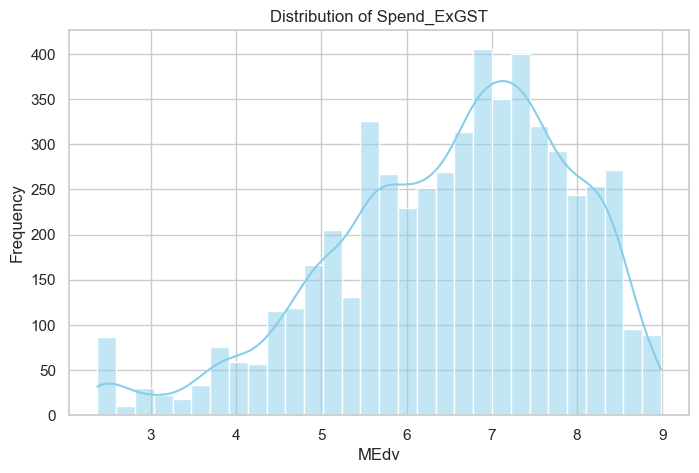

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['log_spend'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('MEdv')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [27]:
y = df['log_spend']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=63)

In [28]:
m2 = LinearRegression()

In [29]:
m2.fit(X_train,y_train)

LinearRegression()

In [31]:
print("Train score : ",m2.score(X_train,y_train))
print("Test score : ",m2.score(X_test,y_test))

Train score :  4.7995106721265834e-05
Test score :  0.0003568210831287333


In [33]:
freq_counts = df.groupby(['AssetTypeID','YearsAfterInstallation']).size()
max_freq = freq_counts.max()
max_freq

191

In [34]:
max_frequency_records = freq_counts[freq_counts == max_freq].index.tolist()

print("Records with maximum frequency:")
print(max_frequency_records)

Records with maximum frequency:
[(251, 13.0)]


In [45]:
df = df.sort_values(by=['AssetTypeID','YearsAfterInstallation'])
df

,AssetTypeID,AssetType,YearsAfterInstallation,WorkDescription,Spend_ExGST
5866,1,0 - NOT SET,1.0,L16 FAIL SAFE 3XMIMIC PNL TST,158.04
10104,1,0 - NOT SET,2.0,FRIDGE NOT WORKING; COOLING &,160.00
9511,3,AIR COMPRESSOR,2.0,TSB 1 AIR COMPRESSORS ANNUALLY,3213.22
9510,3,AIR COMPRESSOR,3.0,TSB1 AIR COMPRESSOR & AIR DRYE,1749.02
4538,3,AIR COMPRESSOR,6.0,Following maintenance it was f,645.00
...,...,...,...,...,...
324,395,FAN COIL UNIT - HIGH WALL,3.0,Rm1.001 Indoor PCB Replacemen,1295.00
6614,397,FAN COIL UNIT - CASSETTE,20.0,MN00739380 - REPLACE ALL 8 EXV,555.00
5222,419,HEAT EXCHANGER - AIR TO WATER,14.0,Heat exchanger CW bypass valve,4535.55
8520,420,VRF MULTI HEAD OUTDOOR UNIT,8.0,STOCK ROOM TOO HOT,205.00


In [46]:
df = df.drop(columns=['WorkDescription'])

In [47]:
df

,AssetTypeID,AssetType,YearsAfterInstallation,Spend_ExGST
5866,1,0 - NOT SET,1.0,158.04
10104,1,0 - NOT SET,2.0,160.00
9511,3,AIR COMPRESSOR,2.0,3213.22
9510,3,AIR COMPRESSOR,3.0,1749.02
4538,3,AIR COMPRESSOR,6.0,645.00
...,...,...,...,...
324,395,FAN COIL UNIT - HIGH WALL,3.0,1295.00
6614,397,FAN COIL UNIT - CASSETTE,20.0,555.00
5222,419,HEAT EXCHANGER - AIR TO WATER,14.0,4535.55
8520,420,VRF MULTI HEAD OUTDOOR UNIT,8.0,205.00


In [48]:
df.to_csv('Dataset/sameRecords.csv',index=False)

In [49]:
df

,AssetTypeID,AssetType,YearsAfterInstallation,Spend_ExGST
5866,1,0 - NOT SET,1.0,158.04
10104,1,0 - NOT SET,2.0,160.00
9511,3,AIR COMPRESSOR,2.0,3213.22
9510,3,AIR COMPRESSOR,3.0,1749.02
4538,3,AIR COMPRESSOR,6.0,645.00
...,...,...,...,...
324,395,FAN COIL UNIT - HIGH WALL,3.0,1295.00
6614,397,FAN COIL UNIT - CASSETTE,20.0,555.00
5222,419,HEAT EXCHANGER - AIR TO WATER,14.0,4535.55
8520,420,VRF MULTI HEAD OUTDOOR UNIT,8.0,205.00


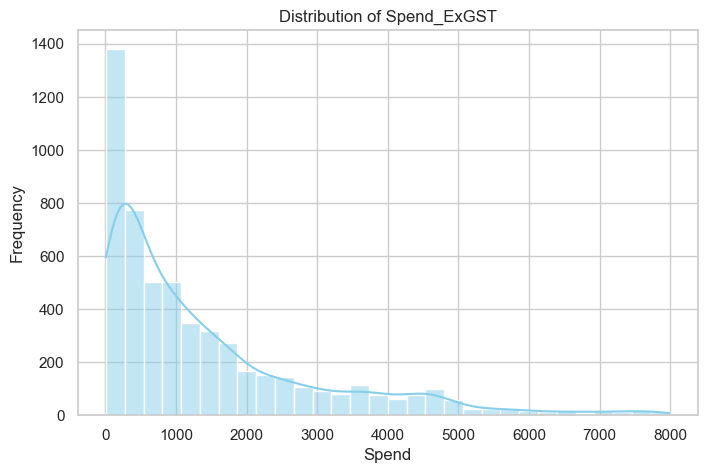

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['Spend_ExGST'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [52]:
rf = RandomForestRegressor(n_estimators=30, random_state=43)

In [53]:
X = df[['AssetTypeID','YearsAfterInstallation']]
y = df['Spend_ExGST']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=63)

In [59]:
X_train

,AssetTypeID,YearsAfterInstallation
3868,59,4.0
4278,27,21.0
8728,95,11.0
3405,15,16.0
3578,90,24.0
...,...,...
8822,89,3.0
3731,45,7.0
5243,11,10.0
5300,143,27.0


In [56]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=43)

In [58]:
y_pred = rf.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 1580.94
R-squared: -0.00


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
print(y.mean())

1410.1061390451937


In [61]:
df['log_cost'] = np.log1p(df['Spend_ExGST'])

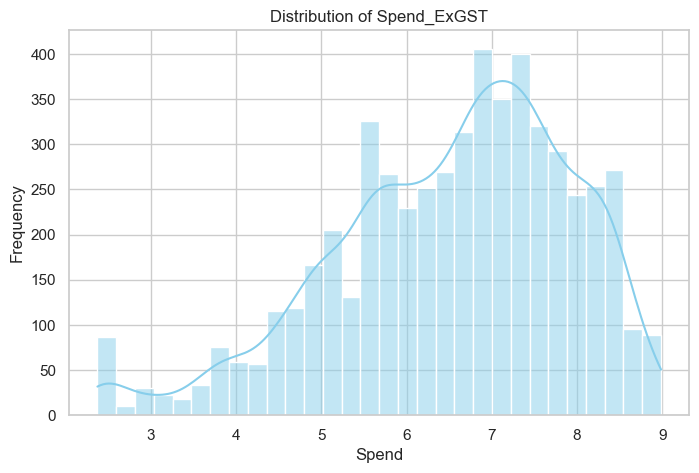

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plotting a histogram
sns.histplot(df['log_cost'], bins=30, kde=True, color='skyblue')

# Set plot labels and title
plt.xlabel('Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Spend_ExGST')

# Show the plot
plt.show()

In [62]:
y = df['log_cost']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=63)

In [64]:
rf2 = RandomForestRegressor(n_estimators=30, random_state=43)

In [65]:
rf2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=43)

In [66]:
y_pred = rf2.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 1.26
R-squared: 0.20


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
df

,AssetTypeID,AssetType,YearsAfterInstallation,Spend_ExGST,log_cost
5866,1,0 - NOT SET,1.0,158.04,5.069156
10104,1,0 - NOT SET,2.0,160.00,5.081404
9511,3,AIR COMPRESSOR,2.0,3213.22,8.075340
9510,3,AIR COMPRESSOR,3.0,1749.02,7.467382
4538,3,AIR COMPRESSOR,6.0,645.00,6.470800
...,...,...,...,...,...
324,395,FAN COIL UNIT - HIGH WALL,3.0,1295.00,7.167038
6614,397,FAN COIL UNIT - CASSETTE,20.0,555.00,6.320768
5222,419,HEAT EXCHANGER - AIR TO WATER,14.0,4535.55,8.419922
8520,420,VRF MULTI HEAD OUTDOOR UNIT,8.0,205.00,5.327876


In [69]:
df = df.drop(columns=['AssetType','log_cost'])

In [70]:
df

,AssetTypeID,YearsAfterInstallation,Spend_ExGST
5866,1,1.0,158.04
10104,1,2.0,160.00
9511,3,2.0,3213.22
9510,3,3.0,1749.02
4538,3,6.0,645.00
...,...,...,...
324,395,3.0,1295.00
6614,397,20.0,555.00
5222,419,14.0,4535.55
8520,420,8.0,205.00


In [71]:
df.to_csv('Dataset/dataForCTGAN.csv')